# Beta distribution

ref1: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html

The probability density function for beta is:
$$f(x,a,b)=\frac{\Gamma(a+b) x^{a-1} (1-x)^{b-1}}{\Gamma(a) \Gamma(b)}$$
for $0 \leq x \leq 1, a > 0, b > 0$, where $\Gamma $ is the gamma function (scipy.special.gamma).

beta takes $a$ and $b$ as shape parameters.

The probability density above is defined in the “standardized” form. To shift and/or scale the distribution use the loc and scale parameters. Specifically, beta.pdf(x, a, b, loc, scale) is identically equivalent to beta.pdf(y, a, b) / scale with y = (x - loc) / scale. Note that shifting the location of a distribution does not make it a “noncentral” distribution; noncentral generalizations of some distributions are available in separate classes.

In [6]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

In [8]:
a, b = 2.31, 0.627
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
print(mean, var, skew, kurt)

0.7865168539325842 0.04264874077027537 -1.1240714863228223 0.5654574834055228


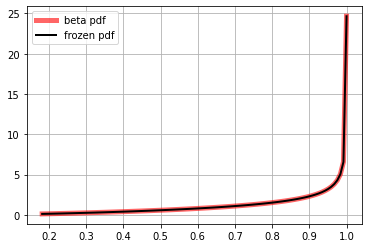

In [13]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(beta.ppf(0.01, a, b),
                beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')
rv = beta(a, b)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.legend()
ax.grid()

In [42]:
from scipy.special import gamma # Don't confused with scipy.stats.gamma
def beta_pdf(x, a, b):
    '''
    '''
    #gamma = gamma_function(a + b) / \
    #        (gamma_function(a) * gamma_function(b))
    y = gamma(a+b) * (x ** (a - 1)) * ((1 - x) ** (b - 1)) / gamma(a) / gamma(b)
    return y

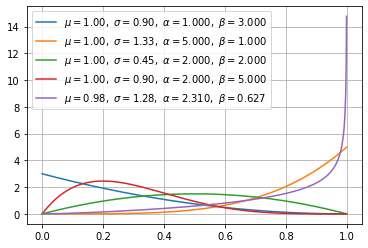

In [43]:
for ls in [(1, 3), (5, 1), (2, 2), (2, 5), (2.31, 0.627)]:
    a, b = ls[0], ls[1]

    # x in [0, 1], trial is 1/0.001 = 1000
    x   = np.arange(0, 1, 0.001, dtype=float)
    y   = beta_pdf(x, a, b)
    u,s = np.mean(y), np.std(y)
    plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f,'
                         r'\ \alpha=%4.3f,\ \beta=%4.3f$' % (u, s, a, b))
plt.legend()
plt.savefig('graph/beta.png')
plt.grid()
plt.show()

上面这张图看上去与基于scipy.stats.beta.pdf生成的图不一致，其实只是因为beta.pdf在末端已经非常陡峭，如以下代码所示:

beta.pdf(0.9997) vs beta.pdf(0.999)

In [45]:
a = 2.31
b = 0.627
print(beta.ppf(0.99, a, b))
print(beta_pdf(beta.ppf(0.99, a, b),a,b))
print(beta_pdf(0.999,a,b))

0.9997456303513707
24.644118428307447
14.77499578909324
